In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive

drive.mount('/content/drive')

# Load data
file_path = '/content/drive/My Drive/Colab Notebooks/Timeseries-data.csv'
data = pd.read_csv(file_path, sep=',', parse_dates={'Datetime': ['Date Time']}, dayfirst=True, index_col='Datetime')
data = data.sort_index()
data = data.loc['2009-01-01':'2009-07-31']
data = data.head(5000)


# Ensure data has the necessary columns
if not all(col in data.columns for col in ['T', 'P', 'Rho']):
    raise ValueError("The dataset must contain 'T', 'P', and 'Rho' columns.")

# Normalize data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, index=data.index, columns=data.columns)

# Split data
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

# Helper function to prepare data for TimeseriesGenerator
def create_generator(data, target_col, input_cols, lookback):
    generator = TimeseriesGenerator(
        data[input_cols].values,
        data[target_col].values,
        length=lookback,
        batch_size=1
    )
    return generator

# Parameters
lookback = 10

Mounted at /content/drive


<ipython-input-1-235e858c2acc>:15: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  data = pd.read_csv(file_path, sep=',', parse_dates={'Datetime': ['Date Time']}, dayfirst=True, index_col='Datetime')


In [2]:
# Univariate Forecasting
univariate_train_gen = create_generator(train_data, 'T', ['T'], lookback)
univariate_test_gen = create_generator(test_data, 'T', ['T'], lookback)

# Build and train univariate model
univariate_model = Sequential([
    LSTM(50, activation='relu', input_shape=(lookback, 1)),
    Dense(1)
])
univariate_model.compile(optimizer='adam', loss='mse')
univariate_model.fit(univariate_train_gen, epochs=20, verbose=1)

# Predictions for univariate
univariate_train_pred = univariate_model.predict(univariate_train_gen)
univariate_test_pred = univariate_model.predict(univariate_test_gen)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3990/3990 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.0117
Epoch 2/20
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 2.3185e-04
Epoch 3/20
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 1.5747e-04
Epoch 4/20
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 1.2052e-04
Epoch 5/20
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 9.9450e-05
Epoch 6/20
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 8.6130e-05
Epoch 7/20
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 7.8563e-05
Epoch 8/20
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 6.6141e-05
Epoch 9/20
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 7.2593e-05
Epoch 10/20
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 5.9456e-05
Epoch 11/20
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 6.2773e-05
Epoch 12/20
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 6.1832e-05
Epoch 13/20
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 6.0197e-05
Epoch 14/20
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/s

In [3]:
# Multivariate Forecasting
multivariate_train_gen = create_generator(train_data, 'T', ['T', 'P', 'Rho'], lookback)
multivariate_test_gen = create_generator(test_data, 'T', ['T', 'P', 'Rho'], lookback)

# Build and train multivariate model
multivariate_model = Sequential([
    LSTM(50, activation='relu', input_shape=(lookback, 3)),
    Dense(1)
])
multivariate_model.compile(optimizer='adam', loss='mse')
multivariate_model.fit(multivariate_train_gen, epochs=20, verbose=1)

# Predictions for multivariate
multivariate_train_pred = multivariate_model.predict(multivariate_train_gen)
multivariate_test_pred = multivariate_model.predict(multivariate_test_gen)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3990/3990 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 0.0069
Epoch 2/20
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 2.6795e-04
Epoch 3/20
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 1.5907e-04
Epoch 4/20
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 1.2206e-04
Epoch 5/20
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 9.3004e-05
Epoch 6/20
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 7.4625e-05
Epoch 7/20
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 7.7543e-05
Epoch 8/20
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 6.9651e-05
Epoch 9/20
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 5.7136e-05
Epoch 10/20
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 6.3961e-05
Epoch 11/20
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 6.4655e-05
Epoch 12/20
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 5.8419e-05
Epoch 13/20
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 6.4127e-05
Epoch 14/20
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/s

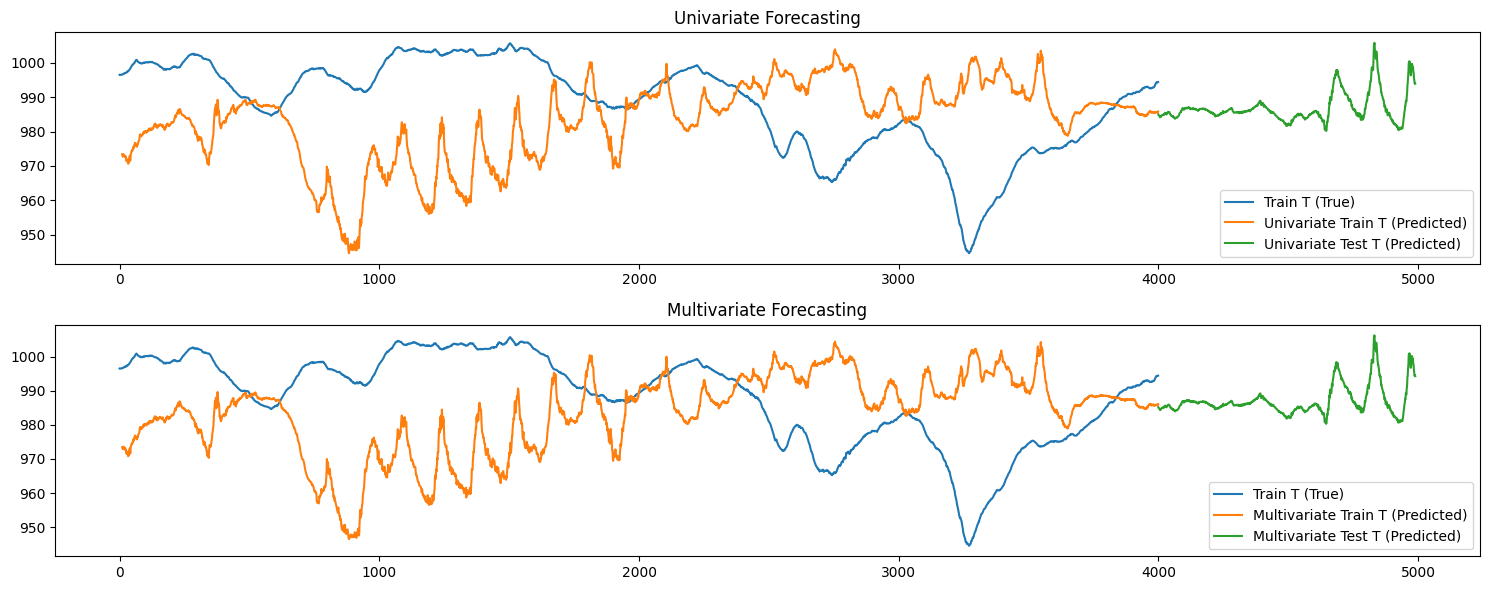

In [4]:
# Rescale predictions
univariate_train_pred = scaler.inverse_transform(
    np.hstack((univariate_train_pred, np.zeros((len(univariate_train_pred), 2))))
)[:, 0]
univariate_test_pred = scaler.inverse_transform(
    np.hstack((univariate_test_pred, np.zeros((len(univariate_test_pred), 2))))
)[:, 0]

multivariate_train_pred = scaler.inverse_transform(
    np.hstack((multivariate_train_pred, np.zeros((len(multivariate_train_pred), 2))))
)[:, 0]
multivariate_test_pred = scaler.inverse_transform(
    np.hstack((multivariate_test_pred, np.zeros((len(multivariate_test_pred), 2))))
)[:, 0]

# Rescale original data
train_data = scaler.inverse_transform(train_data)
test_data = scaler.inverse_transform(test_data)

# Plot results
plt.figure(figsize=(15, 6))

plt.subplot(2, 1, 1)
plt.plot(train_data[:, 0], label='Train T (True)')
plt.plot(range(lookback, len(univariate_train_pred) + lookback), univariate_train_pred, label='Univariate Train T (Predicted)')
plt.plot(range(len(train_data), len(train_data) + len(univariate_test_pred)), univariate_test_pred, label='Univariate Test T (Predicted)')
plt.legend()
plt.title('Univariate Forecasting')

plt.subplot(2, 1, 2)
plt.plot(train_data[:, 0], label='Train T (True)')
plt.plot(range(lookback, len(multivariate_train_pred) + lookback), multivariate_train_pred, label='Multivariate Train T (Predicted)')
plt.plot(range(len(train_data), len(train_data) + len(multivariate_test_pred)), multivariate_test_pred, label='Multivariate Test T (Predicted)')
plt.legend()
plt.title('Multivariate Forecasting')

plt.tight_layout()
plt.show()
